In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os

directory = "/kaggle/input/ir-assn3/"
files = os.listdir(directory)
print(files)


In [2]:
import numpy as np
import pandas as pd
import os
import re
import spacy
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# **Q1**

In [12]:


import pandas as pd

def main(url, pickle_path):
    chunks = []
    chunk_size = 200000
    for chunk in pd.read_json(url, lines=True, chunksize=chunk_size):
        chunks.append(chunk)
        del chunk
    df = pd.concat(chunks, ignore_index=True)
    df.to_pickle(pickle_path)  # Save DataFrame to pickle file
    del chunks  # Free up memory by deleting the list of chunks
    del df

In [ ]:
url1 = "meta_Electronics.json"
pickle_path1 = "meta_Electronics.pkl"  # Specify the path where you want to save the pickle file
main(url1, pickle_path1)

In [ ]:
# df_five_core
url2 = "Electronics.json"
pickle_path2 = "Electronics.pkl" 
main(url2, pickle_path2)

# **Q2**

In [3]:
import pandas as pd

# Load the DataFrame from the pickle file
df = pd.read_pickle("meta_Electronics.pkl")

# Filter the DataFrame to find the ASINs associated with headphones
headphone_asins = df[df['title'].str.contains('Headphones', case=False, na=False)]['asin'].unique()

# Print the ASINs associated with headphones
print(len(headphone_asins))

17810


In [ ]:
import pandas as pd

# Load the DataFrame from the pickle file
df1 = pd.read_pickle("Electronics.pkl")

# Filter the DataFrame to find the ASINs associated with headphones
headphone_reviews = df1[df1['asin'].isin(headphone_asins)]

# Print the ASINs associated with headphones
print(len(headphone_reviews))

1061024


In [ ]:
# import pandas as pd

# # Define the URL of the dataset
# url = "/kaggle/input/ir-assn3/meta_Electronics.json/meta_Electronics.json"

# # Initialize an empty list to store the chunks
# chunks = []

# # Define the chunk size
# chunk_size = 10000  # You can adjust this based on your memory constraints

# # Iterate over the dataset in chunks
# for chunk in pd.read_json(url, lines=True, chunksize=chunk_size):
#     chunks.append(chunk)

# # Concatenate the chunks into a single DataFrame
# df = pd.concat(chunks, ignore_index=True)

In [ ]:
df

category  \
0       [Electronics, Camera &amp; Photo, Video Survei...   
1                       [Electronics, Camera &amp; Photo]   
2       [Electronics, eBook Readers &amp; Accessories,...   
3       [Electronics, eBook Readers & Accessories, eBo...   
4       [Electronics, eBook Readers & Accessories, eBo...   
...                                                   ...   
786440  [Electronics, Portable Audio & Video, MP3 & MP...   
786441  [Electronics, Computers & Accessories, Laptop ...   
786442  [Electronics, Portable Audio & Video, CB & Two...   
786443  [Electronics, Computers & Accessories, Compute...   
786444  [Electronics, Computers & Accessories, Compute...   

                                                    tech1  \
0                                                           
1                                                           
2                                                           
3                                                           
4                                                           
...                                                   ...   
786440   class="a-keyvalue prodDetTable" role="present...   
786441                                                      
786442   class="a-keyvalue prodDetTable" role="present...   
786443                                                      
786444                                                      

                                              description fit  \
0       [The following camera brands and models have b...       
1       [This second edition of the Handbook of Astron...       
2       [A zesty tale. (Publishers Weekly)<br /><br />...       
3                                                      []       
4       [&#8220;sex.lies.murder.fame. is brillllli&#82...       
...                                                   ...  ..   
786440  [<b>Specification: </b><br>Item Type: Cassette...       
786441  [<br />Cobiter AC adapters are made with the h...       
786442  [</b>Specifications:<br><br> Original Li-ion B...       
786443                                                 []       
786444                                                 []       

                                                    title  \
0       Genuine Geovision 1 Channel 3rd Party NVR IP S...   
1       Books "Handbook of Astronomical Image Processi...   
2                                          One Hot Summer   
3       Hurray for Hattie Rabbit: Story and pictures (...   
4                          sex.lies.murder.fame.: A Novel   
...                                                   ...   
786440  Tukzer Cassette Player Portable Tape Player Ca...   
786441  Cobiter AC Adapter Battery Charger For IBM LEN...   
786442  Baofeng Original Li-ion Battery Charger Deskto...   
786443  Jricoo 3pack 6ft Micro USB to USB Cable 2.0 6f...   
786444  Jricoo Nylon Braided 2.0 Micro USB Charging Ca...   

                                    also_buy tech2  \
0                                         []         
1                               [0999470906]         
2                   [0425167798, 039914157X]         
3       [0060219521, 0060219580, 0060219394]         
4                                         []         
...                                      ...   ...   
786440                                    []         
786441                                    []         
786442                                    []         
786443                                    []         
786444                          [B00Z7SAZXC]         

                                               brand  \
0                                          GeoVision   
1                                       33 Books Co.   
2       Visit Amazon's Carolina Garcia Aguilera Page   
3                Visit Amazon's Dick Gackenbach Page   
4                   Visit Amazon's Lolita Files Page   
...                                              ...   
786440                      

In [ ]:
# import pandas as pd

# # Define the URL of the dataset
# url = "/kaggle/input/ir-assn3/Electronics_5.json/Electronics_5.json"

# # Initialize an empty list to store the chunks
# chunks1 = []

# # Define the chunk size
# chunk_size1 = 10000  # You can adjust this based on your memory constraints

# # Iterate over the dataset in chunks
# for chunk in pd.read_json(url, lines=True, chunksize=chunk_size):
#     chunks1.append(chunk)

# # Concatenate the chunks into a single DataFrame
# df1 = pd.concat(chunks1, ignore_index=True)
# df1

In [ ]:
print(df.columns)

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')


In [ ]:
headphone_asins = df[df['title'].str.contains('Headphones', case=False, na=False)]['asin'].unique()
headphone_asins
print(len(headphone_asins))

17810


In [ ]:
headphone_reviews = df1[df1['asin'].isin(headphone_asins)]
headphone_reviews
print(len(headphone_reviews))

1061024


# **Q3**

In [ ]:
# Dropping rows where 'reviewText' is missing
headphone_reviews = headphone_reviews.dropna(subset=['reviewText'])

# Filling missing values in 'vote' with 0 (assuming 'vote' indicates the helpfulness votes a review received)
# headphone_reviews['vote'] = headphone_reviews['vote'].fillna(0)
# headphone_reviews.loc[:, 'vote'] = headphone_reviews['vote'].fillna(0)
headphone_reviews.loc[:, 'vote'] = headphone_reviews['vote'].fillna(0.0)
headphone_reviews = headphone_reviews.fillna(0)

In [ ]:
headphone_reviews

overall  verified   reviewTime      reviewerID        asin  \
10653           5     False  09 13, 2014  A31KIO8UDV8JA5  1634521021   
10654           5     False  09 12, 2014  A28V5Y1F9EIP7R  1634521021   
19291           5      True  02 28, 2013  A15U5NUS1EY7IQ  B000001OMI   
19292           3      True  02 13, 2013  A2MJLXO83VPB5L  B000001OMI   
19293           5      True  10 17, 2012   AHGGNAIT6BH5X  B000001OMI   
...           ...       ...          ...             ...         ...   
20994200        5      True  04 30, 2018  A3AYQDP8NVO9OQ  B01HJAVYDU   
20994201        4      True  02 22, 2018   AV00P4480VSP1  B01HJAVYDU   
20994202        2     False   02 4, 2018  A28945KEKCDUZ0  B01HJAVYDU   
20994203        5      True  01 29, 2018   AA3BN0KMLC61Y  B01HJAVYDU   
20994204        5      True   01 5, 2018  A3ARQ8ZXUXPF18  B01HJAVYDU   

                                       style     reviewerName  \
10653           {'Format:': ' Staple Bound'}              BCW   
10654           {'Format:': ' Staple Bound'}   Sherri Chessen   
19291     {'Format:': ' Personal Computers'}     S. Bommarito   
19292     {'Format:': ' Personal Computers'}  Kathy&amp;David   
19293                                      0         Edward H   
...                                      ...              ...   
20994200                                   0        Suzanne T   
20994201                                   0             kfen   
20994202                                   0        ColdSteve   
20994203                                   0        L. Winter   
20994204                                   0         psychmom   

                                                 reviewText  \
10653     Short, concise, easy to understand. Great tips...   
10654     Whomever said that 'good things come in little...   
19291     I'm getting listening stations going in severa...   
19292     2/13/2013 I use these headphones to listen to ...   
19293     Needed Headset for watching and editing videos...   
...                                                     ...   
20994200  This is the third pair of these I've purchased...   
20994201  If you have small ear canal like I do it's tou...   
20994202  Ear buds are slightly smaller than normal earb...   
20994203  I LOVE these earbuds.  I have been looking for...   
20994204  I loved everything about them, inexpensive, pr...   

                                                    summary  unixReviewTime  \
10653                                    easy to understand      1410566400   
10654                            Small, short and mighty!!!      1410480000   
19291                                            Works well      1362009600   
19292         Good Quality - Good for small heads - Fragile      1360713600   
19293                                 HP 200 Stereo Headset      1350432000   
...                                                     ...             ...   
20994200                    Best Earbuds for falling asleep      1525046400   
20994201  Great in ear buds for small ear canals, muffle...      1519257600   
20994202  Ear buds are slightly smaller than normal earb...      1517702400   
20994203                            VERY, VERY COMFORTABLE!      1517184000   
20994204  comfortable, inexpensive, and noise cancelling...      1515110400   

         vote image  
10653     0.0     0  
10654       2     0  
19291       2     0  
19292      15     0  
19293       5     0  
...       ...   ...  
20994200  0.0     0  
20994201  0.0     0  
20994202  0.0     0  
20994203  0.0     0  
20994204  0.0     0  

[1060514 rows x 12 columns]

# **Q4**

In [23]:
import numpy as np

# Number of Reviews
num_reviews = len(headphone_reviews)

# Average Rating Score
avg_rating = headphone_reviews['overall'].mean()

# Number of Unique Products
num_unique_products = headphone_reviews['asin'].nunique()

# Number of Good and Bad Ratings
num_good_ratings = headphone_reviews[headphone_reviews['overall'] > 3].shape[0]
num_bad_ratings = headphone_reviews[headphone_reviews['overall'] <= 3].shape[0]

# Reviews per Rating
reviews_per_rating = headphone_reviews['overall'].value_counts()


In [24]:
num_reviews

1060514

In [25]:
avg_rating

3.8855206060457474

In [26]:
num_unique_products

17808

In [27]:
num_good_ratings

740828

In [28]:
num_bad_ratings

319686

In [29]:
reviews_per_rating

overall
5    555637
4    185191
1    136350
3     98678
2     84658
Name: count, dtype: int64

In [38]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\ecesoclab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


# **Q5**

In [41]:
import spacy
import re
from bs4 import BeautifulSoup

# Load spaCy's small English language model
nlp = spacy.load('en_core_web_sm')

# Disable certain components to speed up the pipeline since we don't need them here
nlp.disable_pipes(['parser', 'ner'])

def clean_text_spacy(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove non-letters
    text = re.sub("[^a-zA-Z]", " ", text)
    # Process the text with spaCy
    doc = nlp(text)
    # Lemmatize words and remove stopwords and words shorter than 2 characters
    cleaned_text = [token.lemma_.lower() for token in doc if not token.is_stop and len(token.text) > 2]
    return " ".join(cleaned_text)

# Apply the spaCy-based cleaning function to review texts
headphone_reviews['cleaned_reviewText'] = headphone_reviews['reviewText'].head(200000).apply(clean_text_spacy)
# Apply the spaCy-based cleaning function to review texts for the first 50000 rows
# headphone_reviews.loc[:50000, 'cleaned_reviewText'] = headphone_reviews.loc[:50000, 'reviewText'].apply(clean_text_spacy)

# first_50000_reviews = headphone_reviews['reviewText'].head(50000)

# # Apply text preprocessing to the first 50000 reviews
# preprocessed_first_50000_reviews = first_50000_reviews.apply(clean_text_spacy)

C:\Users\ecesoclab\AppData\Local\Temp\ipykernel_8648\1544503203.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
C:\Users\ecesoclab\AppData\Local\Temp\ipykernel_8648\1544503203.py:13: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [44]:
headphone_reviews

overall  verified   reviewTime      reviewerID        asin  \
10653           5     False  09 13, 2014  A31KIO8UDV8JA5  1634521021   
10654           5     False  09 12, 2014  A28V5Y1F9EIP7R  1634521021   
19291           5      True  02 28, 2013  A15U5NUS1EY7IQ  B000001OMI   
19292           3      True  02 13, 2013  A2MJLXO83VPB5L  B000001OMI   
19293           5      True  10 17, 2012   AHGGNAIT6BH5X  B000001OMI   
...           ...       ...          ...             ...         ...   
20994200        5      True  04 30, 2018  A3AYQDP8NVO9OQ  B01HJAVYDU   
20994201        4      True  02 22, 2018   AV00P4480VSP1  B01HJAVYDU   
20994202        2     False   02 4, 2018  A28945KEKCDUZ0  B01HJAVYDU   
20994203        5      True  01 29, 2018   AA3BN0KMLC61Y  B01HJAVYDU   
20994204        5      True   01 5, 2018  A3ARQ8ZXUXPF18  B01HJAVYDU   

                                       style     reviewerName  \
10653           {'Format:': ' Staple Bound'}              BCW   
10654           {'Format:': ' Staple Bound'}   Sherri Chessen   
19291     {'Format:': ' Personal Computers'}     S. Bommarito   
19292     {'Format:': ' Personal Computers'}  Kathy&amp;David   
19293                                      0         Edward H   
...                                      ...              ...   
20994200                                   0        Suzanne T   
20994201                                   0             kfen   
20994202                                   0        ColdSteve   
20994203                                   0        L. Winter   
20994204                                   0         psychmom   

                                                 reviewText  \
10653     Short, concise, easy to understand. Great tips...   
10654     Whomever said that 'good things come in little...   
19291     I'm getting listening stations going in severa...   
19292     2/13/2013 I use these headphones to listen to ...   
19293     Needed Headset for watching and editing videos...   
...                                                     ...   
20994200  This is the third pair of these I've purchased...   
20994201  If you have small ear canal like I do it's tou...   
20994202  Ear buds are slightly smaller than normal earb...   
20994203  I LOVE these earbuds.  I have been looking for...   
20994204  I loved everything about them, inexpensive, pr...   

                                                    summary  unixReviewTime  \
10653                                    easy to understand      1410566400   
10654                            Small, short and mighty!!!      1410480000   
19291                                            Works well      1362009600   
19292         Good Quality - Good for small heads - Fragile      1360713600   
19293                                 HP 200 Stereo Headset      1350432000   
...                                                     ...             ...   
20994200                    Best Earbuds for falling asleep      1525046400   
20994201  Great in ear buds for small ear canals, muffle...      1519257600   
20994202  Ear buds are slightly smaller than normal earb...      1517702400   
20994203                            VERY, VERY COMFORTABLE!      1517184000   
20994204  comfortable, inexpensive, and noise cancelling...      1515110400   

         vote image                                 cleaned_reviewText  
10653     0.0     0  short concise easy understand great tip succes...  
10654       2     0  whomever say good thing come little package th...  
19291       2     0  get listening station go elementary classroom ...  
19292      15     0             use headphone listen audiobook use ...  
19293       5     0  need headset watch edit video late night wife ...  
...       ...   ...                                                ...  
20994200  0.0     0                                                NaN  
20994201  0.0     0                                                NaN  
2

In [ ]:
# import re
# from bs4 import BeautifulSoup
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# # Make sure to download the necessary NLTK data
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')

# # Define the text cleaner function
# def clean_text(text):
#     # Remove HTML tags
#     text = BeautifulSoup(text, "html.parser").get_text()
#     # Remove non-letters and convert to lower case
#     text = re.sub("[^a-zA-Z]", " ", text).lower()
#     # Tokenize
#     words = text.split()
#     # Remove stopwords
#     words = [w for w in words if w not in stopwords.words("english")]
#     # Lemmatize
#     lemmatizer = WordNetLemmatizer()
#     words = [lemmatizer.lemmatize(w) for w in words]
#     return " ".join(words)

# # Apply the function to each review
# headphone_reviews['cleaned_reviewText'] = headphone_reviews['reviewText'].apply(lambda x: clean_text(x))


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Rating Distribution as a Pie Chart
# ratings_pie = headphone_reviews['overall'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
# ratings_pie.set_ylabel('')
# plt.title('Distribution of Ratings for Headphones')
# plt.show()

# # Word Cloud for Good and Bad Reviews (example for good reviews)
# from wordcloud import WordCloud

# good_reviews = ' '.join(headphone_reviews[headphone_reviews['overall'] > 3]['cleaned_reviewText'])
# wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(good_reviews)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# # Feature Engineering with TF-IDF
# tfidf = TfidfVectorizer(max_features=5000)
# X = tfidf.fit_transform(headphone_reviews['cleaned_reviewText']).toarray()
# y = headphone_reviews['overall'] > 3  # Simple binary classification for good/bad

# # Splitting the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Training a model
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# # Evaluating the model
# predictions = clf.predict(X_test)
# print(classification_report(y_test, predictions))


In [ ]:
# # Load the dataset
# meta_url = "/kaggle/input/ir-assn3/meta_Electronics.json/meta_Electronics.json"
# reviews_url = "/kaggle/input/ir-assn3/Electronics_5.json/Electronics_5.json"

# meta_chunks = pd.read_json(meta_url, lines=True, chunksize=10000)
# meta_df = pd.concat(meta_chunks, ignore_index=True)
# meta_df

In [ ]:
# reviews_chunks = pd.read_json(reviews_url, lines=True, chunksize=10000)
# reviews_df = pd.concat(reviews_chunks, ignore_index=True)
# reviews_df


In [ ]:
# # Select headphone products
# headphone_asins = meta_df[meta_df['title'].str.contains('Headphones', case=False, na=False)]['asin'].unique()
# headphone_reviews = reviews_df[reviews_df['asin'].isin(headphone_asins)]

# # Preprocess the data
# headphone_reviews = headphone_reviews.dropna(subset=['reviewText'])
# headphone_reviews.loc[:, 'vote'] = headphone_reviews['vote'].fillna(0.0)

# # Descriptive statistics
# num_reviews = len(headphone_reviews)
# avg_rating = headphone_reviews['overall'].mean()
# num_unique_products = headphone_reviews['asin'].nunique()
# num_good_ratings = headphone_reviews[headphone_reviews['overall'] >= 3].shape[0]
# num_bad_ratings = headphone_reviews[headphone_reviews['overall'] < 3].shape[0]
# reviews_per_rating = headphone_reviews['overall'].value_counts()

In [45]:
num_reviews

1060514

In [46]:
avg_rating

3.8855206060457474

In [47]:
num_unique_products

17808

In [48]:
num_good_ratings

740828

In [49]:
num_bad_ratings

319686

In [50]:
reviews_per_rating

overall
5    555637
4    185191
1    136350
3     98678
2     84658
Name: count, dtype: int64

In [51]:
# Preprocess the text
nlp = spacy.load('en_core_web_sm')
nlp.disable_pipes(['parser', 'ner'])

def clean_text_spacy(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub("[^a-zA-Z]", " ", text)
    doc = nlp(text)
    cleaned_text = [token.lemma_.lower() for token in doc if not token.is_stop and len(token.text) > 2]
    return " ".join(cleaned_text)

headphone_reviews['cleaned_reviewText'] = headphone_reviews['reviewText'].head(500).apply(clean_text_spacy)

C:\Users\ecesoclab\AppData\Local\Temp\ipykernel_8648\3392884946.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [53]:
headphone_reviews.to_pickle("headphone_reviews.pkl")

In [4]:
headphone_reviews=pd.read_pickle("headphone_reviews.pkl")

In [56]:
headphone_reviews


overall  verified   reviewTime      reviewerID        asin  \
10653           5     False  09 13, 2014  A31KIO8UDV8JA5  1634521021   
10654           5     False  09 12, 2014  A28V5Y1F9EIP7R  1634521021   
19291           5      True  02 28, 2013  A15U5NUS1EY7IQ  B000001OMI   
19292           3      True  02 13, 2013  A2MJLXO83VPB5L  B000001OMI   
19293           5      True  10 17, 2012   AHGGNAIT6BH5X  B000001OMI   
...           ...       ...          ...             ...         ...   
20994200        5      True  04 30, 2018  A3AYQDP8NVO9OQ  B01HJAVYDU   
20994201        4      True  02 22, 2018   AV00P4480VSP1  B01HJAVYDU   
20994202        2     False   02 4, 2018  A28945KEKCDUZ0  B01HJAVYDU   
20994203        5      True  01 29, 2018   AA3BN0KMLC61Y  B01HJAVYDU   
20994204        5      True   01 5, 2018  A3ARQ8ZXUXPF18  B01HJAVYDU   

                                       style     reviewerName  \
10653           {'Format:': ' Staple Bound'}              BCW   
10654           {'Format:': ' Staple Bound'}   Sherri Chessen   
19291     {'Format:': ' Personal Computers'}     S. Bommarito   
19292     {'Format:': ' Personal Computers'}  Kathy&amp;David   
19293                                      0         Edward H   
...                                      ...              ...   
20994200                                   0        Suzanne T   
20994201                                   0             kfen   
20994202                                   0        ColdSteve   
20994203                                   0        L. Winter   
20994204                                   0         psychmom   

                                                 reviewText  \
10653     Short, concise, easy to understand. Great tips...   
10654     Whomever said that 'good things come in little...   
19291     I'm getting listening stations going in severa...   
19292     2/13/2013 I use these headphones to listen to ...   
19293     Needed Headset for watching and editing videos...   
...                                                     ...   
20994200  This is the third pair of these I've purchased...   
20994201  If you have small ear canal like I do it's tou...   
20994202  Ear buds are slightly smaller than normal earb...   
20994203  I LOVE these earbuds.  I have been looking for...   
20994204  I loved everything about them, inexpensive, pr...   

                                                    summary  unixReviewTime  \
10653                                    easy to understand      1410566400   
10654                            Small, short and mighty!!!      1410480000   
19291                                            Works well      1362009600   
19292         Good Quality - Good for small heads - Fragile      1360713600   
19293                                 HP 200 Stereo Headset      1350432000   
...                                                     ...             ...   
20994200                    Best Earbuds for falling asleep      1525046400   
20994201  Great in ear buds for small ear canals, muffle...      1519257600   
20994202  Ear buds are slightly smaller than normal earb...      1517702400   
20994203                            VERY, VERY COMFORTABLE!      1517184000   
20994204  comfortable, inexpensive, and noise cancelling...      1515110400   

         vote image                                 cleaned_reviewText  
10653     0.0     0  short concise easy understand great tip succes...  
10654       2     0  whomever say good thing come little package th...  
19291       2     0  get listening station go elementary classroom ...  
19292      15     0             use headphone listen audiobook use ...  
19293       5     0  need headset watch edit video late night wife ...  
...       ...   ...                                                ...  
20994200  0.0     0                                                NaN  
20994201  0.0     0                                                NaN  
2

# **Q6**

In [5]:
# # # EDA
# # top_20_most_reviewed = headphone_reviews['asin'].value_counts().head(5000)
# # top_20_least_reviewed = headphone_reviews['asin'].value_counts().tail(5000)
# # most_positively_reviewed = headphone_reviews.loc[headphone_reviews.groupby('asin')['overall'].idxmax()]['asin']

# # reviews_per_year = headphone_reviews.groupby(pd.to_datetime(headphone_reviews['reviewTime']).dt.year).size()

# # good_reviews = ' '.join(headphone_reviews[headphone_reviews['overall'] >= 3]['cleaned_reviewText'])
# # bad_reviews = ' '.join(headphone_reviews[headphone_reviews['overall'] < 3]['cleaned_reviewText'])

# # good_wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(good_reviews)
# # bad_wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(bad_reviews)

# # ratings_pie = headphone_reviews['overall'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
# # ratings_pie.set_ylabel('')

# # max_reviews_year = pd.to_datetime(headphone_reviews['reviewTime']).dt.year.value_counts().idxmax()





# # EDA
# top_20_most_reviewed = headphone_reviews['asin'].value_counts().head(20)
# top_20_least_reviewed = headphone_reviews['asin'].value_counts().tail(20)
# most_positively_reviewed = headphone_reviews.loc[headphone_reviews.groupby('asin')['overall'].idxmax()]['asin']

# reviews_5_year = headphone_reviews.groupby(pd.to_datetime(headphone_reviews['reviewTime']).dt.year).size()

# good_reviews = ' '.join(headphone_reviews[headphone_reviews['overall'] >= 3]['cleaned_reviewText'].astype(str))
# bad_reviews = ' '.join(headphone_reviews[headphone_reviews['overall'] < 3]['cleaned_reviewText'].astype(str))

# good_wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(good_reviews)
# bad_wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(bad_reviews)

# ratings_pie = headphone_reviews['overall'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
# ratings_pie.set_ylabel('')

# max_reviews_year = pd.to_datetime(headphone_reviews['reviewTime']).dt.year.value_counts().idxmax()

# Convert reviewTime to datetime if it's not already
headphone_reviews['reviewTime'] = pd.to_datetime(headphone_reviews['reviewTime'])

# Extract the year from reviewTime
headphone_reviews['reviewYear'] = headphone_reviews['reviewTime'].dt.year


Top 20 Most Reviewed Brands:
 brand
Sony              83714
Sennheiser        57914
Bose              33916
Audio-Technica    24502
Mpow              22654
Bluedio           20870
Symphonized       20628
Koss              19824
Panasonic         19462
Philips           16270
TaoTronics        14669
Plantronics       14421
Etre Jeune        13704
SoundPEATS        13447
Toysdone          12795
JVC               12650
JLAB              12276
MEE audio         11802
Photive           10633
Phaiser           10619
Name: count, dtype: int64
Top 20 Least Reviewed Brands:
 brand
JBJ Trading Inc        1
Marvel Comics          1
HCDZ                   1
Earsonics              1
Niceshop               1
Amstreak               1
TAK                    1
Tuff-luv               1
Ministry Of Sound      1
talabox                1
KINGZER                1
BROOKSTONE             1
Waterwood              1
Gourmandise            1
DK                     1
Tweaked Audio, Inc.    1
VIBE Sound           

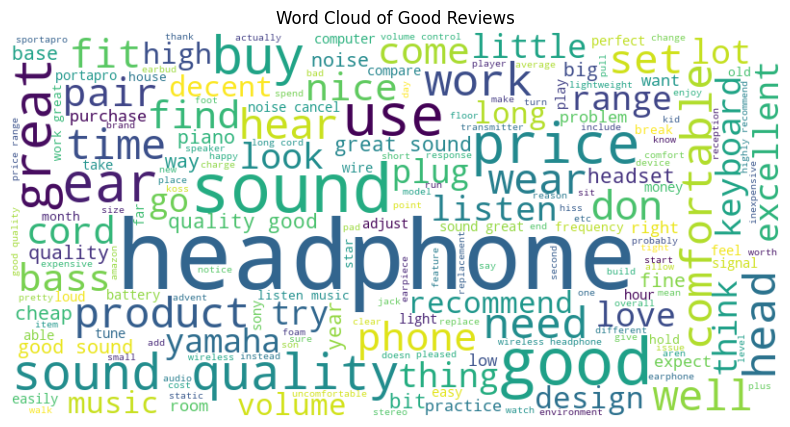

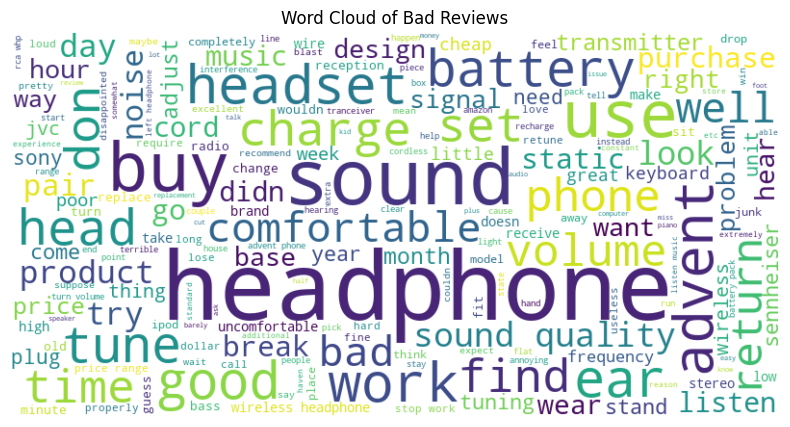

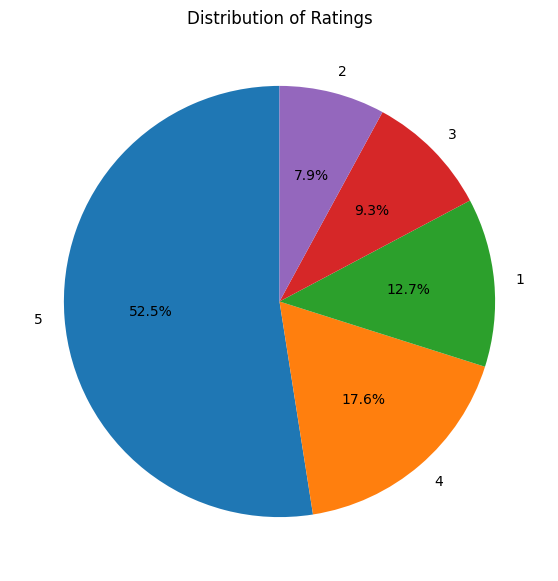

Year with maximum reviews: 2016
The year with the highest number of customers: 2016


In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import datetime

# Assuming headphone_reviews and metadata_df are already loaded and preprocessed

# Merge reviews with metadata to include 'brand' information
headphone_reviews_with_brand = pd.merge(headphone_reviews, df[['asin', 'brand']], on='asin', how='left')

# a) Top 20 Most Reviewed Brands
def top_reviewed_brands():
    top_20_brands = headphone_reviews_with_brand['brand'].value_counts().head(20)
    print("Top 20 Most Reviewed Brands:\n", top_20_brands)

# b) Top 20 Least Reviewed Brands
def least_reviewed_brands():
    least_20_brands = headphone_reviews_with_brand['brand'].value_counts().tail(20)
    print("Top 20 Least Reviewed Brands:\n", least_20_brands)

# c) Most Positively Reviewed Headphone
def most_positively_reviewed_headphone():
    highest_avg_rating = headphone_reviews.groupby('asin')['overall'].mean().idxmax()
    most_positive_headphone = df.loc[df['asin'] == highest_avg_rating, 'title'].iloc[0]
    print("Most Positively Reviewed Headphone:\n", most_positive_headphone)

# d) Count of Ratings for the Product Over 5 Consecutive Years
def ratings_over_years():
    recent_5_years = headphone_reviews_with_brand['reviewYear'].max() - 4
    ratings_count = headphone_reviews_with_brand[headphone_reviews_with_brand['reviewYear'] >= recent_5_years].groupby('reviewYear')['overall'].count()
    print("Ratings Count Over 5 Consecutive Years:\n", ratings_count)

# e) Word Cloud for 'Good' and 'Bad' Ratings
def generate_wordclouds():
    headphone_reviews_with_brand['cleaned_reviewText'] = (
        headphone_reviews_with_brand['cleaned_reviewText']
        .astype(str)  # Ensure all data is string type
        .replace('nan', '')  # Replace 'nan' strings
        .fillna('')  # Replace NaN values
    )
    # Convert 'cleaned_reviewText' to string, replacing NaN values with an empty string
    good_reviews_text = ' '.join(headphone_reviews_with_brand[headphone_reviews_with_brand['overall'] >= 3]['cleaned_reviewText'].astype(str).fillna(''))
    bad_reviews_text = ' '.join(headphone_reviews_with_brand[headphone_reviews_with_brand['overall'] < 3]['cleaned_reviewText'].astype(str).fillna(''))

    good_wordcloud = WordCloud(max_font_size=100, width=800, height=400, background_color="white").generate(good_reviews_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(good_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Good Reviews")
    plt.show()

    bad_wordcloud = WordCloud(max_font_size=100, width=800, height=400, background_color="white").generate(bad_reviews_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(bad_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Bad Reviews")
    plt.show()


# f) Distribution of Ratings vs. Number of Reviews
def ratings_distribution():
    ratings_pie = headphone_reviews_with_brand['overall'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(7, 7))
    plt.ylabel('')
    plt.title('Distribution of Ratings')
    plt.show()

# g) Year with Maximum Reviews
def year_with_max_reviews():
    max_reviews_year = headphone_reviews_with_brand['reviewYear'].value_counts().idxmax()
    print(f"Year with maximum reviews: {max_reviews_year}")

# h) Year with the Highest Number of Customers
def year_with_highest_customers():
    customers_per_year = headphone_reviews_with_brand.groupby('reviewYear')['reviewerID'].nunique()
    max_customers_year = customers_per_year.idxmax()
    print(f"The year with the highest number of customers: {max_customers_year}")

# Execute the functions
top_reviewed_brands()
least_reviewed_brands()
most_positively_reviewed_headphone()
ratings_over_years()
generate_wordclouds()
ratings_distribution()
year_with_max_reviews()
year_with_highest_customers()


# **Q7,8,9,10**

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Feature engineering and model training
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(headphone_reviews['cleaned_reviewText'].astype(str)).toarray()

def rating_class(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

y = headphone_reviews['overall'].apply(rating_class)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

classifiers = [
    LogisticRegression(),
    MultinomialNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
]

for clf in classifiers:
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(f"Classification Report for {clf.__class__.__name__}:")
    print(classification_report(y_test, predictions, zero_division=1))
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average=None, labels=['Good', 'Average', 'Bad'])
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Support:", _)
    print()

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

     Average       1.00      0.00      0.00     24592
         Bad       1.00      0.00      0.00     55457
        Good       0.70      1.00      0.82    185080

    accuracy                           0.70    265129
   macro avg       0.90      0.33      0.27    265129
weighted avg       0.79      0.70      0.57    265129

Precision: [0.69807528 0.         0.        ]
Recall: [1. 0. 0.]
F1-score: [0.82219591 0.         0.        ]
Support: [185080  24592  55457]

Classification Report for MultinomialNB:
              precision    recall  f1-score   support

     Average       0.18      0.00      0.00     24592
         Bad       0.67      0.00      0.00     55457
        Good       0.70      1.00      0.82    185080

    accuracy                           0.70    265129
   macro avg       0.52      0.33      0.27    265129
weighted avg       0.64      0.70      0.57    265129

Precisio

In [2]:
# import pandas as pd
headphone_reviews=pd.read_pickle("headphone_reviews.pkl")

In [3]:
headphone_reviews

overall vote  verified   reviewTime      reviewerID        asin  \
4824           5  2.0      True  02 28, 2013  A15U5NUS1EY7IQ  B000001OMI   
4825           5  5.0      True  10 17, 2012   AHGGNAIT6BH5X  B000001OMI   
4826           4  0.0     False  09 27, 2012  A33HUURDJ4DVG3  B000001OMI   
4827           5  4.0      True  11 27, 2008   A680RUE1FDO8B  B000001OMI   
4828           3  2.0     False  12 24, 2007  A3OLAZKM77XR6P  B000001OMI   
...          ...  ...       ...          ...             ...         ...   
6739452        5  0.0      True   05 4, 2018  A3E7OV7IR941JI  B01HI7D4VY   
6739453        3  0.0      True  03 14, 2018  A26I2RPRWOGD2V  B01HI7D4VY   
6739559        4  0.0      True  09 22, 2018   A3VA3VK4PO1JD  B01HJ8E11E   
6739560        3  0.0      True  09 12, 2018  A11TVS6FKXS80H  B01HJ8E11E   
6739561        4  0.0     False  08 18, 2018  A3VM9K4M0RQZRQ  B01HJ8E11E   

                                      style         reviewerName  \
4824     {'Format:': ' Personal Computers'}         S. Bommarito   
4825                                      0             Edward H   
4826     {'Format:': ' Personal Computers'}                   HB   
4827     {'Format:': ' Personal Computers'}     Jerry Saperstein   
4828     {'Format:': ' Personal Computers'}           Tennis Ace   
...                                     ...                  ...   
6739452                                   0                   JC   
6739453                                   0                  Ray   
6739559                {'Color:': ' White'}                   CD   
6739560                {'Color:': ' White'}          Jay Salamon   
6739561                {'Color:': ' White'}  Vincent Roberson Jr   

                                                reviewText  \
4824     I'm getting listening stations going in severa...   
4825     Needed Headset for watching and editing videos...   
4826     I was out of town for a month and needed a pai...   
4827     Obviously these headphones are not for the aud...   
4828     I bought these headphones at a Tower Records a...   
...                                                    ...   
6739452  I used these for tail light replacement bulbs ...   
6739453               Not the brightest bulb on the block.   
6739559  I have only used these for 1 week at the time ...   
6739560  The product works great, but when it gets down...   
6739561  These earphones are very good. I like the desi...   

                                      summary  unixReviewTime image  \
4824                               Works well      1362009600     0   
4825                    HP 200 Stereo Headset      1350432000     0   
4826      For the price, you cannot beat them      1348704000     0   
4827          Excellent day-to-day headphones      1227744000     0   
4828            Foldable but didn't last long      1198454400     0   
...                                       ...             ...   ...   
6739452                        Excellent LEDS      1525392000     0   
6739453  Not the brightest bulb on the block.      1520985600     0   
6739559                          They work...      1537574400     0   
6739560       30% charge shuts the device off      1536710400     0   
6739561                      Decent earphones      1534550400     0   

                                        cleaned_reviewText  
4824     get listening station go elementary classroom ...  
4825     need headset watch edit video late night wife ...  
4826     town month need pair headphone walk want spend...  
4827     obviously headphone audiophile person expect b...  
4828     buy headphone tower records year ago nice fold...  
...                                                    ...  
6739452                                                NaN  
6739453                                                NaN  
6739559                                                NaN  
6739560                                                NaN  
6739561   

In [ ]:
# # Feature engineering and model training
# tfidf = TfidfVectorizer(max_features=5000)
# X = tfidf.fit_transform(headphone_reviews['cleaned_reviewText']).toarray()

# def rating_class(rating):
#     if rating > 3:
#         return 'Good'
#     elif rating == 3:
#         return 'Average'
#     else:
#         return 'Bad'

# y = headphone_reviews['overall'].apply(rating_class)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# classifiers = [
#     RandomForestClassifier(n_estimators=100, random_state=42),
#     # Add more classifiers here
# ]

# for clf in classifiers:
#     clf.fit(X_train, y_train)
#     predictions = clf.predict(X_test)
#     print(f"Classification Report for {clf.__class__.__name__}:")
#     print(classification_report(y_test, predictions))


# **Q11**

In [16]:

# Collaborative filtering
headphone_reviews = headphone_reviews.sample(frac=0.1, random_state=42)
user_item_matrix = headphone_reviews.pivot_table(index='reviewerID', columns='asin', values='overall')
# Fill NaN values with 0 in the user-item matrix
user_item_matrix = user_item_matrix.fillna(0)

scaler = MinMaxScaler()
normalized_matrix = scaler.fit_transform(user_item_matrix)
normalized_matrix = pd.DataFrame(normalized_matrix, columns=user_item_matrix.columns, index=user_item_matrix.index)


In [ ]:
# user_item_matrix_sparse = csr_matrix(user_item_matrix.values)

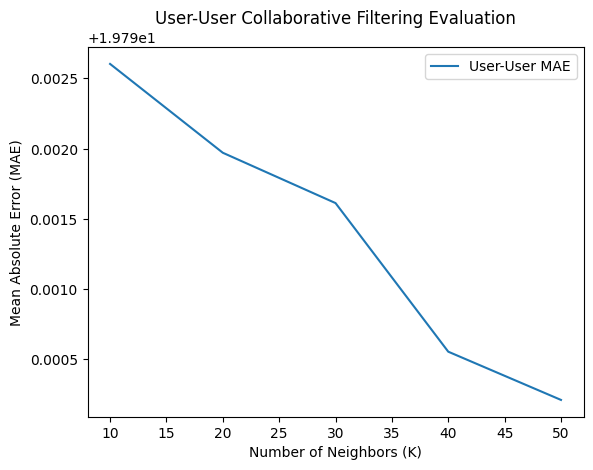

In [18]:
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming headphone_reviews has been defined and preprocessed

# Create a user-item matrix and convert it to a sparse CSR matrix
user_item_matrix = headphone_reviews.pivot_table(index='reviewerID', columns='asin', values='overall').fillna(0)
user_item_matrix_sparse = csr_matrix(user_item_matrix.values)

# Use MinMaxScaler to normalize the sparse matrix
# Note: MinMaxScaler does not support sparse input for fitting, so we skip normalization in this example
# normalized_matrix = scaler.fit_transform(user_item_matrix_sparse)

def evaluate_user_user(k_values, user_item_matrix_sparse):
    kf = KFold(n_splits=5)
    mae_values = []
    
    for k in k_values:
        mae_sum = 0
        for train_index, test_index in kf.split(user_item_matrix_sparse):
            # Since splitting indices, we extract rows directly for train and test using .tolil() for efficiency
            train_data = user_item_matrix_sparse.tolil()[train_index]
            test_data = user_item_matrix_sparse.tolil()[test_index]
            
            # Compute user similarities - directly on sparse matrices
            user_similarities = cosine_similarity(train_data, dense_output=False)
            
            for test_user_idx in range(test_data.shape[0]):
                test_user_ratings = test_data[test_user_idx].toarray().ravel()
                non_zero_items = test_user_ratings.nonzero()[0]
                
                # Ensure you're iterating over items the user has rated
                for item_idx in non_zero_items:
                    similar_users_indices = np.argsort(-user_similarities[test_user_idx].toarray().ravel())[1:k+1]
                    # Predict rating based on similar users
                    predicted_rating = np.mean(train_data[similar_users_indices, item_idx].toarray())
                    actual_rating = test_user_ratings[item_idx]
                    
                    mae_sum += abs(predicted_rating - actual_rating)
        
        mae_avg = mae_sum / (test_data.shape[0] * len(non_zero_items))
        mae_values.append(mae_avg)
    
    return mae_values

k_values = [10, 20, 30, 40, 50]
user_user_mae = evaluate_user_user(k_values, user_item_matrix_sparse)


# Plot the results
plt.plot(k_values, user_user_mae, label='User-User MAE')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('User-User Collaborative Filtering Evaluation')
plt.legend()
plt.show()


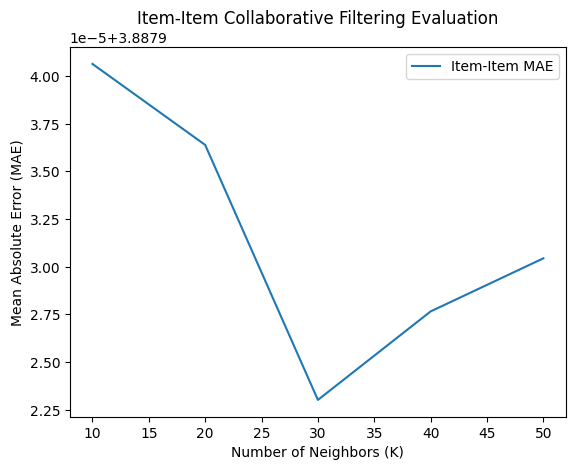

In [19]:


def evaluate_item_item(k_values, user_item_matrix_sparse, item_identifiers):
    kf = KFold(n_splits=5)
    mae_values = []

    # Convert user_item_matrix_sparse to CSR format for efficient row and column slicing
    user_item_matrix_csr = user_item_matrix_sparse.tocsr()
    
    # Transpose the matrix to work with items as rows for item-item comparison
    item_matrix_csr = user_item_matrix_csr.T

    for k in k_values:
        mae_sum = 0
        total_predictions = 0

        for train_index, test_index in kf.split(item_matrix_csr):
            # Splitting the data
            train_data = item_matrix_csr[train_index]
            test_data = item_matrix_csr[test_index]

            # Calculate cosine similarity for items
            item_similarities = cosine_similarity(train_data, dense_output=False)

            for idx, test_item_index in enumerate(test_index):
                # Get actual ratings for the test item
                actual_ratings = user_item_matrix_csr[:, test_item_index].toarray().ravel()

                # Find k most similar items
                similarity_scores = item_similarities[idx, :]
                top_k_indices = np.argsort(-similarity_scores.toarray().ravel())[1:k+1]  # Exclude self

                # Predict ratings for the test item based on similar items' ratings by users
                similar_items_ratings = train_data[top_k_indices].toarray()
                user_ratings_mean = np.nanmean(similar_items_ratings, axis=0)

                # Only consider users who have rated the test item
                valid_user_indices = np.where(actual_ratings > 0)[0]
                predicted_ratings = user_ratings_mean[valid_user_indices]
                actual_valid_ratings = actual_ratings[valid_user_indices]

                # Calculate MAE for the current fold and add to the sum
                if len(valid_user_indices) > 0:  # Check to ensure division is valid
                    mae_sum += np.sum(np.abs(predicted_ratings - actual_valid_ratings))
                    total_predictions += len(valid_user_indices)

        # Compute the average MAE over all folds
        average_mae = mae_sum / total_predictions if total_predictions > 0 else float('nan')
        mae_values.append(average_mae)

    return mae_values

# Assuming user_item_matrix_sparse is already defined and filled
# Assuming item_identifiers contains the ASINs corresponding to the columns in user_item_matrix_sparse

k_values = [10, 20, 30, 40, 50]
item_item_mae = evaluate_item_item(k_values, user_item_matrix_sparse, user_item_matrix.columns.tolist())

# Plot the results
plt.plot(k_values, item_item_mae, label='Item-Item MAE')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Item-Item Collaborative Filtering Evaluation')
plt.legend()
plt.show()


# **Q12**

In [1]:
top_products = headphone_reviews.groupby('asin')['overall'].sum().nlargest(10)
top_products

NameError: name 'headphone_reviews' is not defined